# Udacity Project - Data Analysis for Baseball Data

## Introduction
This project is the final project for the Udacity Intro to Data Analysis course (https://www.udacity.com/course/intro-to-data-analysis--ud170)

In this Jupyter Notebook we'll be working through analyzing baseball data from 1985 to 2016 to derive interesting insights from the data. 
The Data Analysis process goes as follows:<br>
Questions -----> Wrangle -----> Explore -----> Conclusions -----> Communicate 

As for the data, we'll be using the The Lahman Baseball Database (source: http://www.seanlahman.com/baseball-archive/statistics/).

To start the project let's import the Python libraries NumPy, Pandas, Seaborn, and Matplotlib to make the analysis of our baseball data easier.

In [1]:
# Import NumPy, Panda, Matplotlib, and Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Questions For Analysis

First let's come up with questions that we want answered, and then use the data to answer those questions. 

### Question 1
As I am an avid college sports fan (like most students that went to University of Michigan, Go Blue!), I wanted to see which Universities were attended the most by MLB All-Stars. 

As a note, this isn't a question into causation, i.e. whether attendance at a certain University causes a player to become an All-Star (that's outside of scope for this project). This is just an analysis on which Universities MLB All-Stars attended the most.

* Which University did All Stars attend most?

### Question 2
A general manager and team owner will most likely want to know how much money players will cost them in the future. 

Let's look at the general salary spend per year and see if it's increasing or decreasing.

* How has Total Salary Spend changed each Year?

### Question 3
I've always found it fascinating that the top players in any sport get paid what seems to be a much larger amount then their fellow colleagues. Even though the skill level between normal players and an All Star doesn't seem as drastic as the pay difference. 

A question, I'd like to investigate is how much more the average All Star player makes compared to the average of all players in the league.

To do this analysis, I want to use the most recent year in the data, which is 2016, and find the difference between the average salary of All Stars and the average salary of all players.

* What is the mean Salary of All Stars VS. the mean salary of all players in 2016?

## Analysis of which Universities MLB All-Stars attended

To get started in answering our question of which Universities are most attended by All-Stars, we will need to first "wrangle the data" by bringing the data into our notebook and then cleaning the data so we can begin analysis. 

We will be using the AllstarFull.csv file from (http://www.seanlahman.com/baseball-archive/statistics/). 

In [2]:
# Import All-Star Full CSV file
allstar_df = pd.read_csv('AllstarFull.csv')

# Check to make sure the file loaded properly.
allstar_df.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


In [3]:
# Check to see if we will need to do data cleaning
allstar_df.isnull().sum()

playerID          0
yearID            0
gameNum           0
gameID           49
teamID            0
lgID              0
GP               19
startingPos    3548
dtype: int64

From looking at the data file, AllstartFull.csv, the data we will be using for analysis, playerID, is clean (0 nulls) so we're good to go on with analysis. If we were to use gameID, then we would need to do some cleaning as there are 49 null values, but as this is not the case for this project we can continue on.

Next we'll need the CollegePlaying.csv file from (http://www.seanlahman.com/baseball-archive/statistics/). 

In [4]:
# Import College Playing CSV file
college_playing_df = pd.read_csv('CollegePlaying.csv')

# Check to make sure the file loaded properly
college_playing_df.head()

,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


In [5]:
#check to see if we will need to data cleaning
college_playing_df.isnull().sum()

playerID    0
schoolID    0
yearID      0
dtype: int64

From looking at the data file, CollegePlaying.csv, the data for analysis which is playerID and schoolId is clean (0 null values), so we're good to continue on with analysis.

Now that we have the two files as Data Frames, allstar_schools_df and collegeplaying_df, we will need to merge these two data frames into one so we can begin to analyze the data.

In [6]:
# Merge two Data Frames
allstar_schools_df = allstar_df.merge(college_playing_df, on='playerID',how='inner')

# Make the data frame unique to players and not count the number of All Star appearances
allstar_schools_unique_df = allstar_schools_df.drop_duplicates('playerID')

# Check to make sure the file merged properly
allstar_schools_unique_df.head()

,playerID,yearID_x,gameNum,gameID,teamID,lgID,GP,startingPos,schoolID,yearID_y
0,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0,guilfordnc,1924
24,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0,columbia,1923
31,hildeor01,1933,0,ALS193307060,CLE,AL,0.0,NaN,butler,1927
35,friscfr01,1933,0,ALS193307060,SLN,NL,1.0,4.0,fordham,1919
38,hartnga01,1933,0,ALS193307060,CHN,NL,1.0,NaN,madeajc,1918


To "explore" this question, and dive deeper then just returning one school, we can use a bar chart to visually display the top 20 Universities and how many All Stars attended those Universities.

To start we're going to need to group the data by the University. Then we will sort the data to see the Universities which were attended the most. 

In [7]:
# Group By School ID
grouped_allstar_schools_unique_df = allstar_schools_unique_df.groupby('schoolID')
grouped_school_allstar_series = grouped_allstar_schools_unique_df.count().sort_values('playerID','index',ascending=False)['playerID'].head(20)

# Check to make sure our Grouping and Sort worked
grouped_school_allstar_series.head()

schoolID
usc          17
arizonast    12
texas         9
lsu           9
michigan      8
Name: playerID, dtype: int64

Now that we have the grouped data, we can make our bar graph.

Populating the interactive namespace from numpy and matplotlib


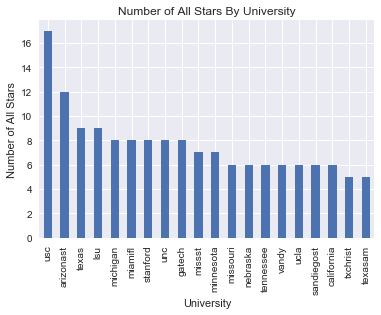

In [8]:
# Create Bar Graph of All-Stars by University
%pylab inline
grouped_school_allstar_graph = grouped_school_allstar_series.plot(kind='bar', ax=None, figsize=None, use_index=True, title='Number of All Stars By University', grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False)
grouped_school_allstar_graph.set_xlabel('University')
grouped_school_allstar_graph.set_ylabel('Number of All Stars')

This is great! As we can see USC was the most attended by All Star MLB players. Arizona State came second, with my alma mater University of Michigan finished tied for 5th.

For further analysis, as some All Stars didn't go to a University before entering the league, it would be interesting to see how ratio of All Star's that attended Universities compare to All Stars that didn't attend a University.

Let's actually dive into this follow up question. What is the total number of All Stars that attended a University vs. the total number of All Stars that did not attend a University.

In [9]:
# All-Stars that Attended a University
all_stars_attended_university_number = allstar_schools_unique_df.count()["playerID"]
print("Number of All Stars that attended a University: " + str(all_stars_attended_university_number))

Number of All Stars that attended a University: 642


In [10]:
# All-Stars that didn't Attend a University
all_stars_total_number = allstar_df.drop_duplicates('playerID').count()["playerID"]
all_stars_did_not_attend_university_number = all_stars_total_number - all_stars_attended_university_number
print("Number of All Stars that did not attend a University: " + str(all_stars_did_not_attend_university_number))

Number of All Stars that did not attend a University: 1132


From this we can see that there were more All Stars that did not attend a University, 1132 players, versus the amount of All Stars that did attend a University which is 642.

## Analysis of Total Salary Spend

To start analyzing total spend on player salary, we will need to "wrangle the data" into a format that will allow us to perform our analysis.

We'll be using the Salaries.csv file from (http://www.seanlahman.com/baseball-archive/statistics/).

In [11]:
# Read in Salaries CSV
salaries_df = pd.read_csv('Salaries.csv')

# Check to make sure the file is imported correctly
salaries_df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [12]:
# Check to see if we need to do data cleaning
salaries_df.isnull().sum()

yearID      0
teamID      0
lgID        0
playerID    0
salary      0
dtype: int64

From looking at the data file, Salaries.csv the data we will be using of salary and yearID appears to be clean (0 null values), so we can continue on with the analysis.

Now let's make a line chart of how Total Salary Spend has increased each year. This will give us a visual representation of the Salary data and maybe we can get some idea if Total Salary Spend is increasing or decreasing each year. To start we're going to need to group the Salary by Year. 

In [13]:
# Group Salaries By Year
group_salaries_year_series = salaries_df.groupby('yearID').sum()['salary']

# Check to see if the grouping worked
group_salaries_year_series.head()

yearID
1985    261964696
1986    307854518
1987    272575375
1988    300452424
1989    359995711
Name: salary, dtype: int64

Now let's create a line plot of the Salary Spend By Year to see the trend in Salary spending. 

Populating the interactive namespace from numpy and matplotlib


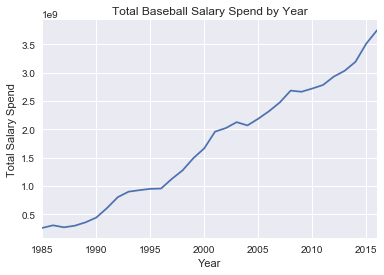

In [14]:
# Create Line Graph
%pylab inline
group_salaries_year_graph = group_salaries_year_series.plot(kind='line', ax=None, figsize=None, use_index=True, title='Total Baseball Salary Spend by Year', grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False)
group_salaries_year_graph.set_xlabel('Year')
group_salaries_year_graph.set_ylabel('Total Salary Spend')

From looking at the graph, there appears to be a positive trend of Salary increasing each year. We can take a visual guess that if the trend continues total Salary spend in 2017 will be greater than 2016. 

However, it's important to note that while the overall trend is positive, there were a few years in the graph that had negative drops, so it would not be safe to assume, that the salary spend in 2017 will be greater.

For further analysis we could fit regression models to the data to predict 2017 and on salary spend. That we'll save for an exploration outside of this project.

## Analysis of All-Star Salary Vs. Normal Player Salary

Again, to start this analysis, we're going to need to do some data wrangling again, even though we've imported the two files necessary for this question in the previous analysis. To start we're first going to filter the Salaries Data Frame and the All Star Data Frame to only contain 2016 data, as 2016 is the year we chose to do this analysis.

In [15]:
# Filter the salaries Data Frame to contain only 2016 data is below:
salaries_2016_filter = salaries_df['yearID']==2016
salaries_2016_df = salaries_df[salaries_2016_filter]

# Check to see if we have the 2016 values
salaries_2016_df.head()

,yearID,teamID,lgID,playerID,salary
25575,2016,ARI,NL,ahmedni01,521600
25576,2016,ARI,NL,barreja01,507500
25577,2016,ARI,NL,brachsi01,509300
25578,2016,ARI,NL,britoso01,508500
25579,2016,ARI,NL,castiwe01,3700000


Now we'll do the same thing with All Star Data Frame.

In [16]:
# Filter Data
allstar_2016_filter = allstar_df['yearID'] == 2016
allstar_2016_df = allstar_df[allstar_2016_filter]

#Check to see if we have the 2016 values
allstar_2016_df.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
5069,altuvjo01,2016,0,ALS201607120,HOU,AL,1.0,4.0
5070,brachbr01,2016,0,ALS201607120,BAL,AL,0.0,NaN
5071,brittza01,2016,0,ALS201607120,BAL,AL,1.0,NaN
5072,bettsmo01,2016,0,ALS201607120,BOS,AL,1.0,9.0
5073,bogaexa01,2016,0,ALS201607120,BOS,AL,1.0,6.0


Now that we have the 2016 values for both the Salary Data Frame and the All Star Data Frame, we're going to join the two into one Data Frame so we can perform our analysis of finding the mean salary for All Stars.

In [17]:
# Join DataFrames
allstar_salary_2016_df = allstar_2016_df.merge(salaries_2016_df, on='playerID',how='inner')
allstar_salary_2016_df.head()

,playerID,yearID_x,gameNum,gameID,teamID_x,lgID_x,GP,startingPos,yearID_y,teamID_y,lgID_y,salary
0,altuvjo01,2016,0,ALS201607120,HOU,AL,1.0,4.0,2016,HOU,AL,3687500
1,brachbr01,2016,0,ALS201607120,BAL,AL,0.0,NaN,2016,BAL,AL,1250000
2,brittza01,2016,0,ALS201607120,BAL,AL,1.0,NaN,2016,BAL,AL,6750000
3,bettsmo01,2016,0,ALS201607120,BOS,AL,1.0,9.0,2016,BOS,AL,566000
4,bogaexa01,2016,0,ALS201607120,BOS,AL,1.0,6.0,2016,BOS,AL,650000


To answer this question we're going to want to compare the average salary of an All Star player in 2016, with the average salary of all players in 2016, and than compare those two numbers to see if there is a difference.

So let's dive right in and calculate the average Salary of an All Star and the average salary of All Players.

In [18]:
# All-Star Salary Mean
allstar_salary_2016_mean = allstar_salary_2016_df.mean()['salary']
all_salary_2016_mean = salaries_2016_df.mean()['salary']

print('All Star Mean Salary in 2016: $' + str(allstar_salary_2016_mean))
print('All Players Mean Salary in 2016: $' + str(all_salary_2016_mean))

All Star Mean Salary in 2016: $7827074.53247
All Players Mean Salary in 2016: $4396409.60375


Now let's calculate the differences in the two averages.

In [19]:
# Calculate Averages
print('Average Difference between Salaries: $' + str(allstar_salary_2016_mean - all_salary_2016_mean))

Average Difference between Salaries: $3430664.92872


The difference between the average salary of All-Stars and the average salary of all players in 2016 is $3,430,664. 

This seems prety staggering, and from the eye test it definitely looks like All Star players get paid more than the average player.

For further analysis, creating a hypothesis test to understand if this difference is significant for us to be confident that All Stars get paid more than the average player would be a great follow up analysis. But again we'll save that analysis for outside of this project.

## Data Limitiations
Now that we've answered our questions, to end the project we need to briefly discuss some data limitations.

1) The baseball historical data only spans back to 1985, however the National League was established in 1876, which gives us over 100 years of missing data that we didn't get to analyze. <br>

2) It's important to note that the answers to the questions above only shows observations and do not go into causation. Causation is outside the scope of this Udacity course. For example, just because we see that USC was attended the most by All Stars, it would be to presemptious for us to conclude that attending USC causes MLB players to be All Stars. As another example, we see difference in the average All Star salary and the average salary of all MLB players, but we haven't done the analysis yet to understand if being an All Star causes a player to have a higher salary.

Thanks for reading!